# Desafio com o dataframe do ifood

O objetivo de hoje é fazer uma análise exploratória desses dados. Responda usando a sua ferramenta de preferência:


Quantos dados temos? Linhas e colunas </br>
Quais são as colunas numéricas? </br>
Temos duplicados na nossa base? Se tivermos, retire-os </br>
Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles? </br>
Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/mkt_data.csv')

In [3]:
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


#### Formato do Dataset

In [4]:
print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

Quantidade de linhas: 2205
Quantidade de colunas: 44


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

#### Selecionando as colunas numéricas

In [7]:
numericas = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numericas).columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

#### Valores nulos: Há valores nulos nas colunas sobre nível educacional 

In [8]:
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

#### Informações das colunas income, kids e expenses?

In [11]:
df[["kids", "Income", "expenses"]].describe().round(2)

,kids,Income,expenses
count,2205.00,2205.00,2205.00
mean,0.95,51622.09,562.76
std,0.75,20713.06,575.94
min,0.00,1730.00,4.00
25%,0.00,35196.00,56.00
50%,1.00,51287.00,343.00
75%,1.00,68281.00,964.00
max,3.00,113734.00,2491.00


#### Retirando a colunas 'Unnamed: 0'

In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
print('Informações do dataframe: ', end='\n\n')
df.info()

Informações do dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64 

#### Estatísticas de todas as colunas

In [13]:
df.describe().round(2)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,...,198.0,54.0,1113.0,364.0,476.0,2205.00,2205.00,2205.00,2205.00,2205.00
mean,1102.00,51622.09,0.44,0.51,49.01,306.16,26.40,165.31,37.76,27.13,...,1.0,2.0,3.0,4.0,5.0,562.76,518.71,0.30,0.95,562.76
std,636.67,20713.06,0.54,0.54,28.93,337.49,39.78,217.78,54.82,41.13,...,0.0,0.0,0.0,0.0,0.0,575.94,553.85,0.68,0.75,575.94
min,0.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.0,2.0,3.0,4.0,5.0,4.00,-283.00,0.00,0.00,4.00
25%,551.00,35196.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,...,1.0,2.0,3.0,4.0,5.0,56.00,42.00,0.00,0.00,56.00
50%,1102.00,51287.00,0.00,0.00,49.00,178.00,8.00,68.00,12.00,8.00,...,1.0,2.0,3.0,4.0,5.0,343.00,288.00,0.00,1.00,343.00
75%,1653.00,68281.00,1.00,1.00,74.00,507.00,33.00,232.00,50.00,34.00,...,1.0,2.0,3.0,4.0,5.0,964.00,884.00,0.00,1.00,964.00
max,2204.00,113734.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,...,1.0,2.0,3.0,4.0,5.0,2491.00,2458.00,4.00,3.00,2491.00


#### O maior salário

In [17]:
print(f"O maior salário é de: {df.Income.max()}")

O maior salário é de: 113734.0


#### A distribuição de salário no dataset

<AxesSubplot: >

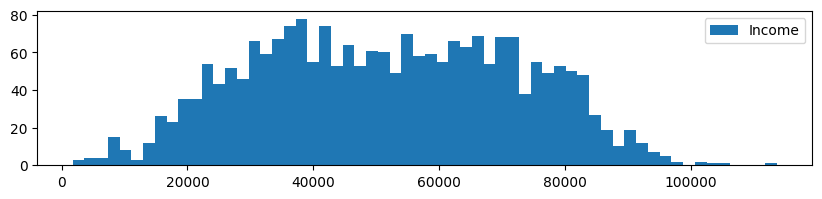

In [35]:
df["Income"].hist(grid=False, bins=60, legend=True, figsize=(10, 2))

#### A distribuição de gastos

<AxesSubplot: >

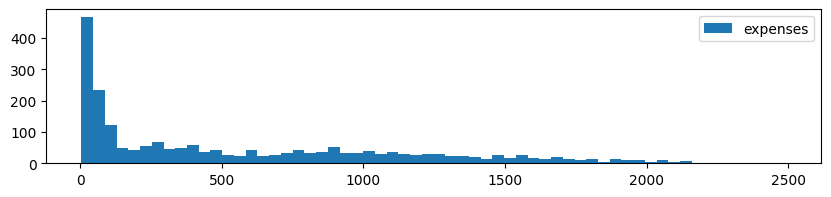

In [32]:
df["expenses"].hist(grid=False, bins=60, legend=True, figsize=(10, 2))

#### Coeficiente de variação

In [36]:
print(f"Coeficiente de variação de ganhos: ")
df["Income"].std()/df["Income"].mean()

Coeficiente de variação de ganhos.


0.4012441554786958

#### Boxplot's

<AxesSubplot: >

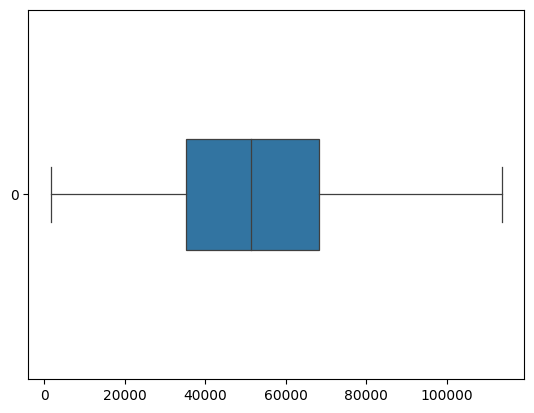

In [56]:
sns.boxplot(
    df["Income"], 
    orient="h",
    width=0.3,
    linewidth=0.9)

<AxesSubplot: >

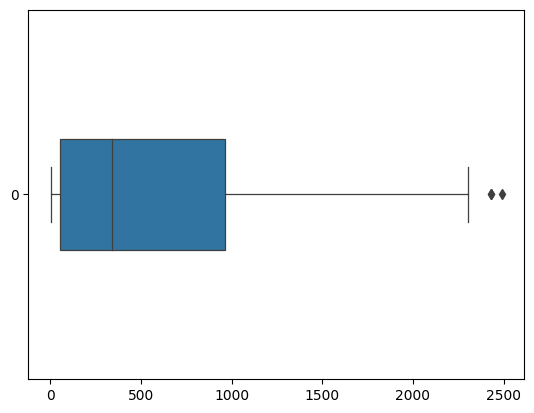

In [57]:
sns.boxplot(
    df["expenses"], 
    orient="h",
    width=0.3,
    linewidth=0.9)

#### Relação de estado civil com filhos

<AxesSubplot: xlabel='marital_status', ylabel='kids'>

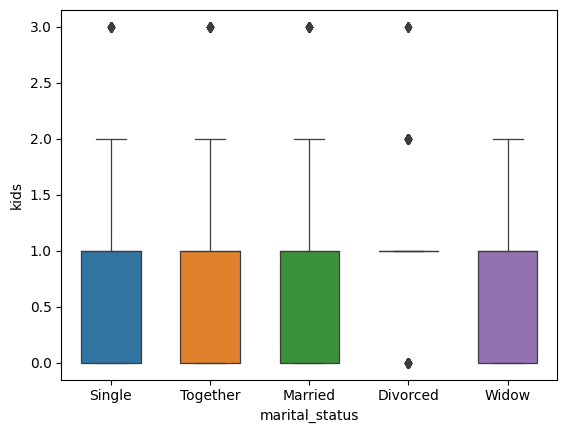

In [110]:
sns.boxplot(x='marital_status', y='kids', data=df, width=0.6, linewidth=0.9)

In [101]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


In [105]:
print("Média de filhos por status de união: ")
df.groupby("marital_status")["kids"].mean().round(2)

Média de filhos por status de união: 


marital_status
Divorced    1.01
Married     0.97
Single      0.86
Together    0.98
Widow       0.88
Name: kids, dtype: float64

In [106]:
print("Mediana de filhos por status de união: ")
df.groupby("marital_status")["kids"].median()

Mediana de filhos por status de união: 


marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

#### Gráficos de barras

<AxesSubplot: xlabel='education_level', ylabel='count'>

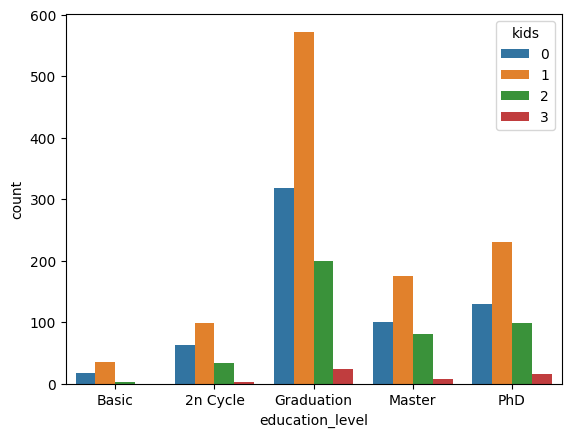

In [78]:
sns.countplot(data=df, 
              x=df["education_level"], 
              width=0.8, 
              order=["Basic", "2n Cycle",  "Graduation", "Master", "PhD"],
              hue="kids")

<AxesSubplot: xlabel='education_level', ylabel='count'>

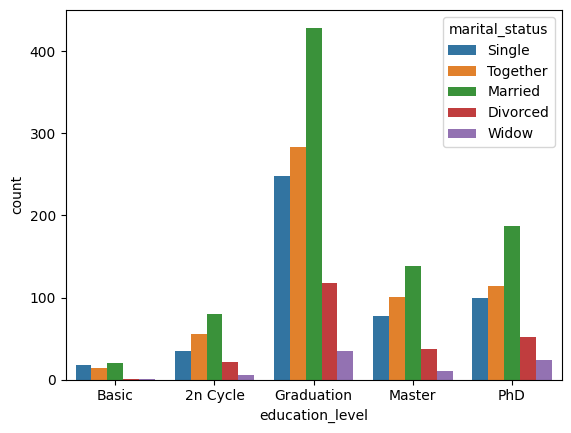

In [79]:
sns.countplot(data=df, 
              x=df["education_level"], 
              width=0.8, 
              order=["Basic", "2n Cycle",  "Graduation", "Master", "PhD"],
              hue="marital_status")

<AxesSubplot: xlabel='kids', ylabel='count'>

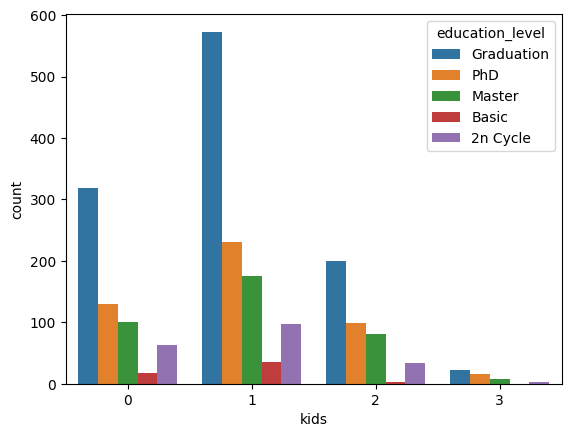

In [80]:
sns.countplot(data=df, 
              x=df["kids"], 
              width=0.8, 
              hue="education_level")

#### Números

In [83]:
print(f"Porcentagem de Graduation: {(df.education_level.value_counts(normalize=True) * 100)[0].round(2)} %")
print(f"Porcentagem de PhD: {(df.education_level.value_counts(normalize=True) * 100)[1].round(2):>12} %")
print(f"Porcentagem de Master: {(df.education_level.value_counts(normalize=True) * 100)[2].round(2):>9} %")
print(f"Porcentagem de 2n Cycle: {(df.education_level.value_counts(normalize=True) * 100)[3].round(2):>7} %")
print(f"Porcentagem de Basic: {(df.education_level.value_counts(normalize=True) * 100)[4].round(2):>10} %")

Porcentagem de Graduation: 50.48 %
Porcentagem de PhD:        21.59 %
Porcentagem de Master:     16.51 %
Porcentagem de 2n Cycle:    8.98 %
Porcentagem de Basic:       2.45 %


In [82]:
print(f"Porcentagem de Married: {(df.marital_status.value_counts(normalize=True) * 100)[0].round(2):>6} %")
print(f"Porcentagem de Together: {(df.marital_status.value_counts(normalize=True) * 100)[1].round(2)} %")
print(f"Porcentagem de Single: {(df.marital_status.value_counts(normalize=True) * 100)[2].round(2):>7} %")
print(f"Porcentagem de Divorced: {(df.marital_status.value_counts(normalize=True) * 100)[3].round(2)} %")
print(f"Porcentagem de Widow: {(df.marital_status.value_counts(normalize=True) * 100)[4].round(2):>8} %")


Porcentagem de Married:  38.73 %
Porcentagem de Together: 25.76 %
Porcentagem de Single:   21.63 %
Porcentagem de Divorced: 10.43 %
Porcentagem de Widow:     3.45 %


In [89]:
print(f"Porcentagem de 0 filhos: {(df.kids.value_counts(normalize=True) * 100)[1].round(2)} %")
print(f"Porcentagem de 1 filho: {(df.kids.value_counts(normalize=True) * 100)[0].round(2):>6} %")
print(f"Porcentagem de 2 filhos: {(df.kids.value_counts(normalize=True) * 100)[2].round(2):>3} %")
print(f"Porcentagem de 3 filhos: {(df.kids.value_counts(normalize=True) * 100)[3].round(2):>5} %")


Porcentagem de 0 filhos: 50.43 %
Porcentagem de 1 filho:  28.48 %
Porcentagem de 2 filhos: 18.82 %
Porcentagem de 3 filhos:  2.27 %


### Scatterplots

<AxesSubplot: xlabel='education_level', ylabel='expenses'>

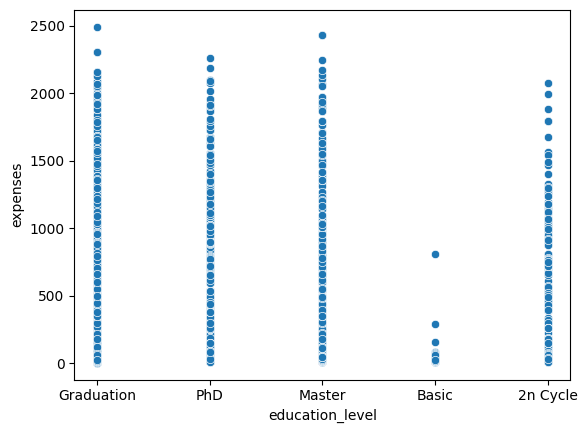

In [137]:
sns.scatterplot(x="education_level", y="expenses", data=df)

<AxesSubplot: xlabel='education_level', ylabel='expenses'>

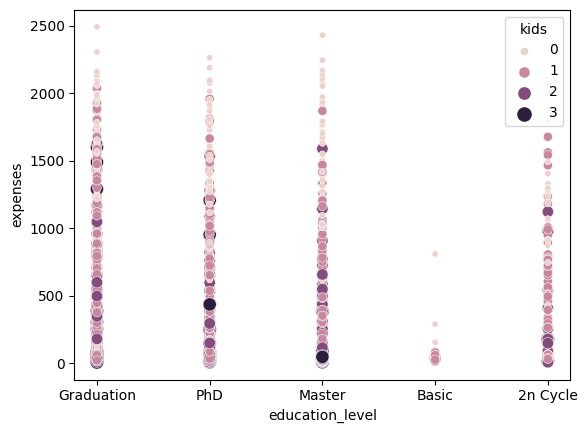

In [90]:
sns.scatterplot(x="education_level", y="expenses", data=df, hue="kids", size="kids", sizes=(20, 90))

Relação de gastos com filhos usando Scatterplot: 


<AxesSubplot: xlabel='Income', ylabel='expenses'>

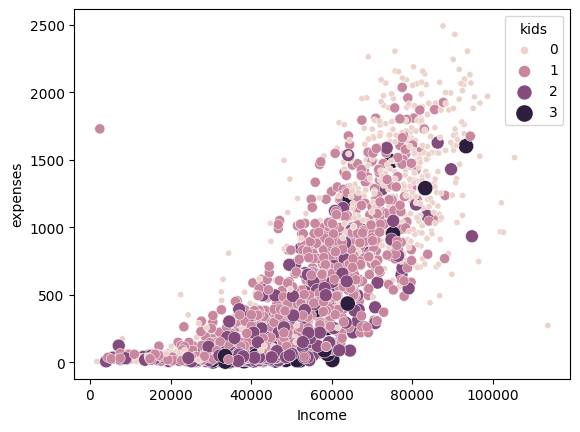

In [107]:
print("Relação de gastos com filhos usando Scatterplot: ")
sns.scatterplot(x="Income", y="expenses", data=df, hue="kids", size="kids", sizes=(20, 120))

<AxesSubplot: xlabel='Income', ylabel='expenses'>

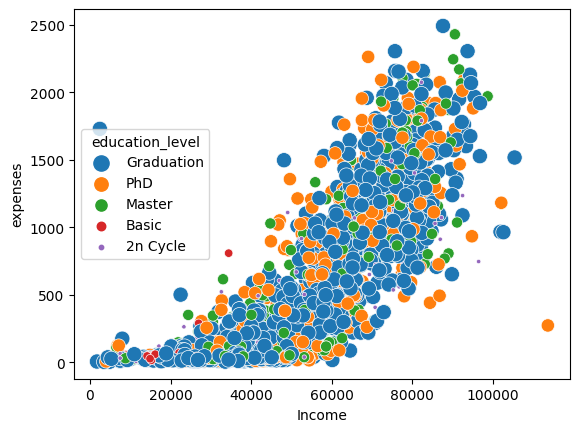

In [92]:
sns.scatterplot(x="Income", y="expenses", data=df, hue="education_level", size="education_level", sizes=(10, 120))

<AxesSubplot: xlabel='Income', ylabel='expenses'>

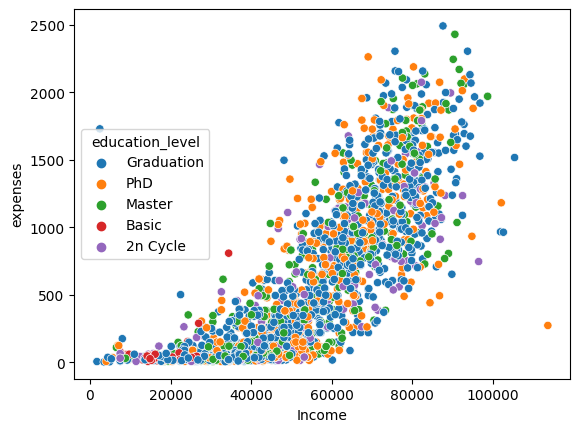

In [93]:
sns.scatterplot(x="Income", y="expenses", data=df, hue="education_level")

<AxesSubplot: xlabel='kids', ylabel='Income'>

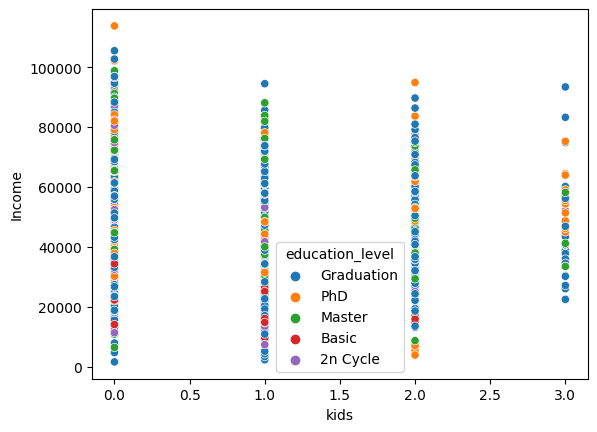

In [96]:
sns.scatterplot(x="kids", y="Income", data=df, hue="education_level")

<AxesSubplot: xlabel='education_level', ylabel='MntWines'>

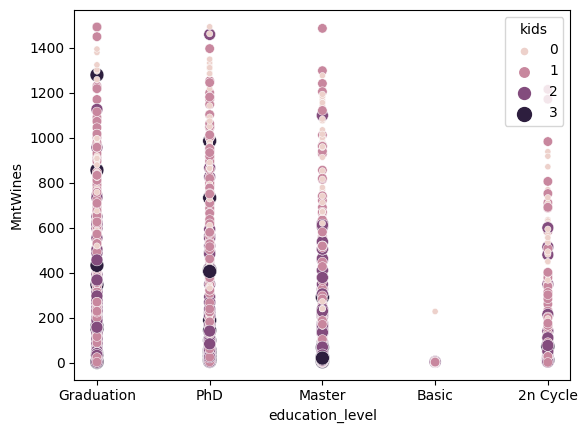

In [97]:
sns.scatterplot(x="education_level", y="MntWines", data=df, hue="kids", size="kids",
    sizes=(20, 100))

#### Relação de gastos com filhos usando Boxplot

<AxesSubplot: xlabel='kids', ylabel='expenses'>

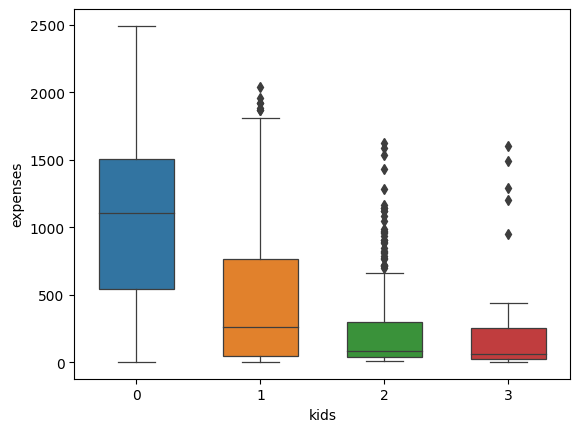

In [111]:
sns.boxplot(x='kids', y='expenses', data=df, width=0.6, linewidth=0.9)

#### A correlação de pearson entre gastos e ganhos

In [114]:
df["expenses"].corr(df["Income"]).round(4)

0.8231